In [176]:
import ArticleComparator as ac
import csv 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from graph import Graph

In [177]:
truth_graph = Graph()
truth_graph.update_graph("data/categories.tsv", mode='Initialization', verbose=False )

In [178]:
#initiate the comparator
article_list = truth_graph.articles
article_comparator = ac.ArticleComparator("data/plaintext_articles/", article_list)

In [179]:
# create a df with path, start, end, length
df_paths_finished = pd.DataFrame(columns=['path', 'start', 'end', 'length'])
counter = 0

with open("data/paths_finished.tsv",encoding="utf8") as file:
            tsv_file = csv.reader(file, delimiter="\t")
            for line in tsv_file:
                # Skip empty or commented lines 
                if len(line)==0 or line[0].startswith("#"):
                    continue
                else:   
                    path = line[3].split(';')
                    if path.__contains__('<') or path.__contains__('Pikachu'):
                        continue
                    start = path[0]
                    end = path[-1]
                    length = len(path)
                    df_paths_finished.loc[counter] = [path, start, end, length]
                    counter += 1
                    

In [180]:
df_paths_finished

,path,start,end,length
0,"[14th_century, 15th_century, 16th_century, Pac...",14th_century,African_slave_trade,9
1,"[14th_century, Europe, Africa, Atlantic_slave_...",14th_century,African_slave_trade,5
2,"[14th_century, Niger, Nigeria, British_Empire,...",14th_century,African_slave_trade,8
3,"[14th_century, Renaissance, Ancient_Greece, Gr...",14th_century,Greece,4
4,"[14th_century, Italy, Roman_Catholic_Church, H...",14th_century,John_F._Kennedy,7
...,...,...,...,...
42261,"[Work_%28thermodynamics%29, Energy, Aristotle,...",Work_%28thermodynamics%29,Film,13
42262,"[Yagan, Ancient_Egypt, Civilization]",Yagan,Civilization,3
42263,"[Yagan, Australia, England, France, United_Sta...",Yagan,U.S._Open_%28tennis%29,7
42264,"[Yarralumla%2C_Australian_Capital_Territory, A...",Yarralumla%2C_Australian_Capital_Territory,Abraham_Lincoln,4


In [181]:
df_paths_finished['article_similarity'] = df_paths_finished.apply(lambda row: [article_comparator.compare_articles(article, row['end']) for article in row['path']], axis=1)
df_paths_finished['title_similarity'] = df_paths_finished.apply(lambda row: [article_comparator.compare_titles(article, row['end']) for article in row['path']], axis=1)

In [182]:
df_paths_finished.sample(10)

,path,start,end,length,article_similarity,title_similarity
25415,"[Poetry_of_the_United_States, English_language...",Poetry_of_the_United_States,Mary_II_of_England,6,"[0.26, 0.55, 0.49, 0.82, 0.8, 1.0]","[0.44, 0.64, 0.69, 0.94, 0.96, 1.0]"
15517,"[Libya, Italy, Benito_Mussolini, Adolf_Hitler]",Libya,Adolf_Hitler,4,"[0.62, 0.39, 0.81, 1.0]","[0.49, 0.43, 0.72, 1.0]"
8477,"[Jesus, Christianity, Europe, Republic_of_Irel...",Jesus,Ireland,5,"[0.43, 0.38, 0.67, 0.43, 1.0]","[0.49, 0.38, 0.63, 0.95, 1.0]"
15114,"[Gas_tungsten_arc_welding, Liquid_crystal, Ele...",Gas_tungsten_arc_welding,Marshall_Islands,8,"[0.3, 0.33, 0.33, 0.34, 0.38, 0.27, 0.12, 1.0]","[0.27, 0.33, 0.41, 0.35, 0.38, 0.37, 0.29, 1.0]"
25981,"[Fascism, Indonesia, Elephant, Ganesha]",Fascism,Ganesha,4,"[0.2, 0.3, 0.23, 1.0]","[0.49, 0.56, 0.49, 1.0]"
26426,"[Radio_frequency, German_language, French_lang...",Radio_frequency,French_Open_%28tennis%29,7,"[0.24, 0.41, 0.45, 0.33, 0.25, 0.48, 1.0]","[0.24, 0.4, 0.5, 0.54, 0.37, 0.29, 1.0]"
37709,"[Ralph_Nader, California, Volcano, Magnesium, ...",Ralph_Nader,Gallium,6,"[0.32, 0.3, 0.52, 0.75, 0.53, 1.0]","[0.63, 0.48, 0.52, 0.63, 0.67, 1.0]"
4473,"[Hubble_Space_Telescope, Earth, Africa, Ethiop...",Hubble_Space_Telescope,Soddo_language,5,"[0.47, 0.22, 0.54, 0.48, 1.0]","[0.35, 0.73, 0.57, 0.59, 1.0]"
10066,"[Ireland, Irish_Sea, Atlantic_Ocean, Tide, Flo...",Ireland,Sand,7,"[0.12, 0.2, 0.19, 0.42, 0.16, 0.32, 1.0]","[0.42, 0.43, 0.39, 0.67, 0.43, 0.85, 1.0]"
11984,"[Brain, Computer_science, Computer_programming...",Brain,DVD,7,"[0.13, 0.16, 0.18, 0.2, 0.32, 0.35, 1.0]","[0.55, 0.4, 0.4, 0.49, 0.55, 0.64, 1.0]"


In [183]:
# drop paths of length 1
df_paths_finished = df_paths_finished[df_paths_finished['length'] > 1]

In [184]:
def score_monotony(sequence):
  # Initialize the score to 0
  score = 0
  
  # Loop through the numbers in the sequence, starting at the second number
  for i in range(1, len(sequence)):
    if np.abs(sequence[i] - sequence[i-1]) < 0.05:
      score += 0
    elif sequence[i] > sequence[i-1]:
      score += 1
    elif sequence[i] < sequence[i-1]:
      score -= 1
    
  return np.clip((score/((len(sequence)-1))), 0, 1).round(2)

In [ ]:
df_paths_finished['score_article_similarity'] = df_paths_finished.apply(lambda row: score_monotony(row['article_similarity']), axis=1)
df_paths_finished['score_title_similarity'] = df_paths_finished.apply(lambda row: score_monotony(row['title_similarity']), axis=1)

In [186]:
# keep only scores between 0 and 1
df_paths_finished.sort_values(by=['score_article_similarity'], ascending=False)

,path,start,end,length,article_similarity,title_similarity,score_article_similarity,score_title_similarity
9777,"[San_Jose%2C_California, World_War_II, Adolf_H...",San_Jose%2C_California,Adolf_Hitler,3,"[0.34, 0.57, 1.0]","[0.42, 0.62, 1.0]",1.0,1.00
26183,"[Lithium, Plant, Gardening]",Lithium,Gardening,3,"[0.14, 0.34, 1.0]","[0.29, 0.79, 1.0]",1.0,1.00
4756,"[Jew, Hebrew_language]",Jew,Hebrew_language,2,"[0.66, 1.0]","[0.71, 1.0]",1.0,1.00
26190,"[Lanthanum, Periodic_table, Russia, Russian_Re...",Lanthanum,Russian_Revolution_of_1917,4,"[0.45, 0.55, 0.68, 1.0]","[0.33, 0.35, 0.73, 1.0]",1.0,0.67
4754,"[Jew, The_Holocaust, Adolf_Hitler]",Jew,Adolf_Hitler,3,"[0.39, 0.63, 1.0]","[0.44, 0.66, 1.0]",1.0,1.00
...,...,...,...,...,...,...,...,...
28121,"[African_clawed_frog, Frog, Eye, Cornea]",African_clawed_frog,Cornea,4,"[0.37, 0.33, 0.22, 1.0]","[0.27, 0.42, 0.69, 1.0]",0.0,1.00
28123,"[Afrikaans, Botswana, Tourism, Infrastructure,...",Afrikaans,United_Arab_Emirates,10,"[0.39, 0.2, 0.4, 0.34, 0.2, 0.43, 0.31, 0.62, ...","[0.51, 0.45, 0.45, 0.53, 0.5, 0.47, 0.48, 0.6,...",0.0,0.33
28129,"[Afrikaans, Slavery, Irish_people, Ireland, Mi...",Afrikaans,Canola,13,"[0.42, 0.23, 0.27, 0.43, 0.37, 0.04, 0.24, 0.3...","[0.61, 0.46, 0.5, 0.59, 0.57, 0.51, 0.45, 0.62...",0.0,0.00
28134,"[Agamemnon, Bible, Jew, Birth_control, Ethics,...",Agamemnon,Genetics,6,"[0.44, 0.45, 0.47, 0.5, 0.45, 1.0]","[0.37, 0.47, 0.43, 0.53, 0.46, 1.0]",0.0,0.40


In [ ]:
# add column 0 if score article  = score tile, 1 id score article > score title, 2 if score article < score title
df_paths_finished['type'] = df_paths_finished.apply(lambda row: 0 if row['score_article_similarity'] == row['score_title_similarity'] else 1 if row['score_article_similarity'] > row['score_title_similarity'] else 2, axis=1)

In [188]:
# show proportion of paths with score 0, 1, 2
df_paths_finished['type'].value_counts(normalize=True)


2    0.456088
0    0.316341
1    0.227571
Name: type, dtype: float64

# Drop all path lengths that are inferior to 100

In [189]:
# drop the entries where the length appear less than 10 times
df_paths_multiple = df_paths_finished.groupby('length').filter(lambda x: len(x) > 100)

<AxesSubplot: title={'center': 'Proportion of paths types per length'}, xlabel='length'>

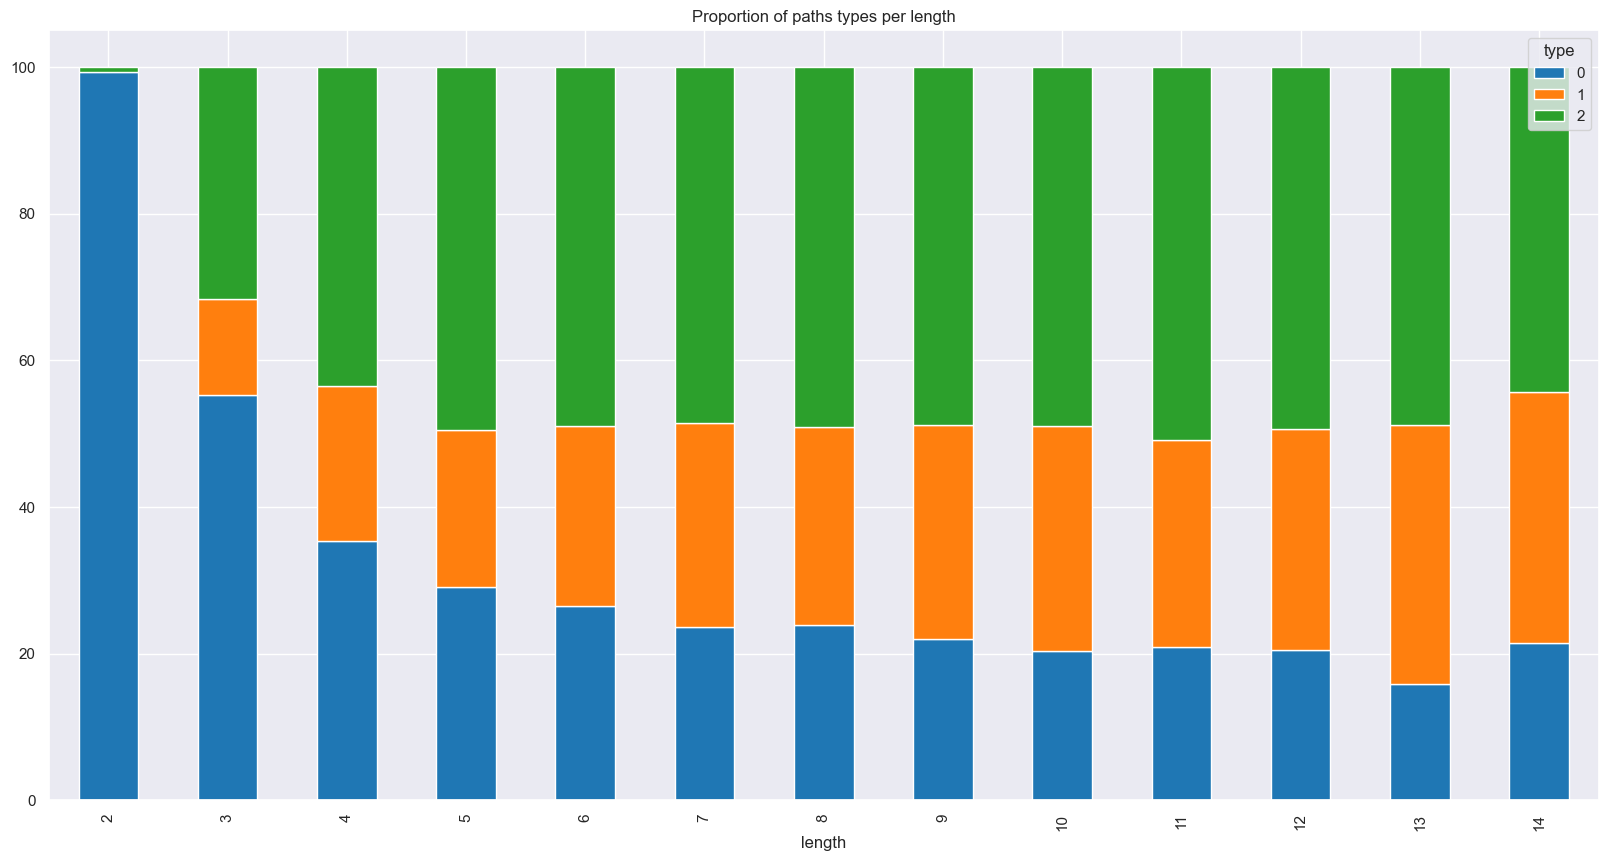

In [190]:
# plot the percentage of playerType 0, 1, 2 per length 
salem = df_paths_multiple.groupby(['length', 'type'], group_keys=False).size().groupby(level=0, group_keys=False).apply(lambda x: 100 * x / float(x.sum())).unstack()

# set the color of the bars
fig, ax = plt.subplots(figsize=(10, 5))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
salem.plot(kind='bar', stacked=True, figsize=(20,10), title='Proportion of paths types per length', color=colors, ax=ax)


<AxesSubplot: xlabel='length', ylabel='Count'>

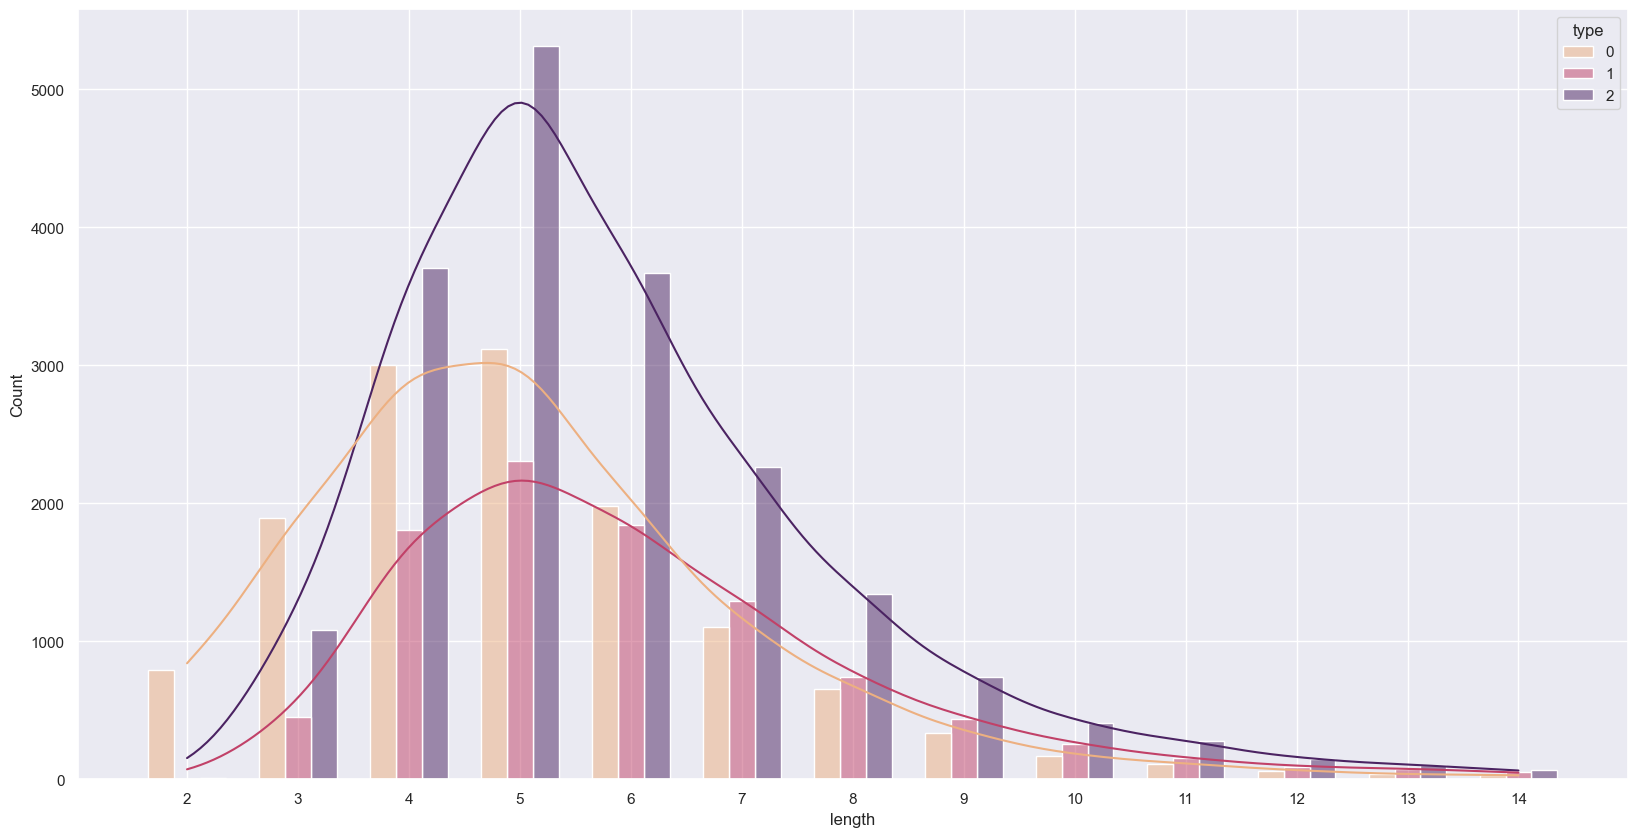

In [191]:
# plot the distribution of the type per length using hue type histplot plot and kde=true, 
sns.set_context("paper")
sns.set_style("darkgrid")
sns.set_theme(palette="flare")
fig, ax = plt.subplots( figsize=(20, 10))
# make sure that the x axis is exatly the same as the one given to the functioon

# change xticks to range(1, 22) to see the distribution of the length #
ax.set_xticks(range(1, 22))

sns.histplot(data=df_paths_multiple, x="length", hue="type",bins=35,stat = 'count',discrete= True, shrink=0.7,
  multiple="dodge", palette="flare", kde=True, ax=ax, kde_kws={'bw_method': 0.28})

In [233]:
# create a df with path, start, end, length
df_paths_unfinished = pd.DataFrame(columns=['path', 'start', 'end', 'length'])
counter = 0

# chek that a list of string named articles contains all elements list of string named list2
def contains_all(articles, path):
    for element in path:
        if not articles.__contains__(element):
            return False
    return True

with open("data/paths_unfinished.tsv",encoding="utf8") as file:
            tsv_file = csv.reader(file, delimiter="\t")
            for line in tsv_file:
                # Skip empty or commented lines 
                if len(line)==0 or line[0].startswith("#"):
                    continue
                else:   
                    path = line[3].split(';')
                    if path.__contains__('<') or path.__contains__('Pikachu') or line[4]=='Pikachu' or not contains_all(article_list, path) or not article_list.__contains__(line[4]):
                        continue
                    
                    start = path[0]
                    end = line[4]
                    length = len(path)
                    df_paths_unfinished.loc[counter] = [path, start, end, length]
                    counter += 1

In [234]:
df_paths_unfinished

,path,start,end,length
0,[Obi-Wan_Kenobi],Obi-Wan_Kenobi,Microsoft,1
1,[Julius_Caesar],Julius_Caesar,Caracas,1
2,"[Malawi, Democracy, Alexander_the_Great]",Malawi,First_Crusade,3
3,[Paraguay],Paraguay,Mount_St._Helens,1
4,"[Paraguay, Bolivia]",Paraguay,Mount_St._Helens,2
...,...,...,...,...
19624,"[Wine, Georgia_%28country%29, Russia]",Wine,History_of_post-Soviet_Russia,3
19625,"[Turks_and_Caicos_Islands, United_States, Iraq...",Turks_and_Caicos_Islands,Iraq_War,6
19626,[Modern_history],Modern_history,Hollandic,1
19627,"[Jamaica, United_Kingdom, World_War_II, Battle...",Jamaica,Alan_Turing,4


In [240]:
# drop paths of length 1
df_paths_unfinished = df_paths_unfinished[df_paths_unfinished['length'] > 1]

In [ ]:
df_paths_unfinished['article_similarity'] = df_paths_unfinished.apply(lambda row: [article_comparator.compare_articles(article, row['end']) for article in row['path']], axis=1)
df_paths_unfinished['title_similarity'] = df_paths_unfinished.apply(lambda row: [article_comparator.compare_titles(article, row['end']) for article in row['path']], axis=1)

In [242]:
df_paths_unfinished

,path,start,end,length,article_similarity,title_similarity
2,"[Malawi, Democracy, Alexander_the_Great]",Malawi,First_Crusade,3,"[0.32, 0.29, 0.47]","[0.39, 0.36, 0.5]"
4,"[Paraguay, Bolivia]",Paraguay,Mount_St._Helens,2,"[0.29, 0.39]","[0.43, 0.47]"
5,"[Agriculture, History_of_the_world, China, Yan...",Agriculture,Grand_Canal_of_China,4,"[0.14, 0.37, 0.57, 0.75]","[0.18, 0.37, 0.76, 0.56]"
6,"[Mind, Christianity, Europe, Renaissance, Anci...",Mind,Scouting,7,"[0.22, 0.41, 0.48, 0.35, 0.31, 0.27, 0.46]","[0.58, 0.43, 0.52, 0.49, 0.31, 0.4, 0.54]"
7,"[4-2-0, United_States, Agriculture, Sugar, Aus...",4-2-0,Cane_Toad,5,"[0.18, 0.28, 0.13, 0.36, 0.32]","[0.45, 0.3, 0.34, 0.57, 0.29]"
...,...,...,...,...,...,...
19623,"[Montenegro, World_War_II, United_States, Cari...",Montenegro,Hurricane_Georges,7,"[0.35, 0.34, 0.44, 0.43, 0.53, 0.79, 0.78]","[0.37, 0.4, 0.37, 0.45, 0.85, 0.79, 0.75]"
19624,"[Wine, Georgia_%28country%29, Russia]",Wine,History_of_post-Soviet_Russia,3,"[0.02, 0.32, 0.25]","[0.22, 0.41, 0.75]"
19625,"[Turks_and_Caicos_Islands, United_States, Iraq...",Turks_and_Caicos_Islands,Iraq_War,6,"[0.16, 0.3, 0.46, 0.19, 0.63, 0.6]","[0.25, 0.5, 0.9, 0.48, 0.63, 0.7]"
19627,"[Jamaica, United_Kingdom, World_War_II, Battle...",Jamaica,Alan_Turing,4,"[0.23, 0.44, 0.41, 0.32]","[0.41, 0.6, 0.41, 0.41]"


In [243]:
df_paths_unfinished['score_article_similarity'] = df_paths_unfinished.apply(lambda row: score_monotony(row['article_similarity']), axis=1)
df_paths_unfinished['score_title_similarity'] = df_paths_unfinished.apply(lambda row: score_monotony(row['title_similarity']), axis=1)

/var/folders/jg/bpl2xhc13x17j6txgdvzf5940000gn/T/ipykernel_23040/4207855533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paths_unfinished['score_article_similarity'] = df_paths_unfinished.apply(lambda row: score_monotony(row['article_similarity']), axis=1)
/var/folders/jg/bpl2xhc13x17j6txgdvzf5940000gn/T/ipykernel_23040/4207855533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paths_unfinished['score_title_similarity'] = df_paths_unfinished.apply(lambda row: score_monotony(row['title_simil

In [244]:
df_paths_unfinished

,path,start,end,length,article_similarity,title_similarity,score_article_similarity,score_title_similarity
2,"[Malawi, Democracy, Alexander_the_Great]",Malawi,First_Crusade,3,"[0.32, 0.29, 0.47]","[0.39, 0.36, 0.5]",0.50,0.50
4,"[Paraguay, Bolivia]",Paraguay,Mount_St._Helens,2,"[0.29, 0.39]","[0.43, 0.47]",1.00,0.00
5,"[Agriculture, History_of_the_world, China, Yan...",Agriculture,Grand_Canal_of_China,4,"[0.14, 0.37, 0.57, 0.75]","[0.18, 0.37, 0.76, 0.56]",1.00,0.33
6,"[Mind, Christianity, Europe, Renaissance, Anci...",Mind,Scouting,7,"[0.22, 0.41, 0.48, 0.35, 0.31, 0.27, 0.46]","[0.58, 0.43, 0.52, 0.49, 0.31, 0.4, 0.54]",0.33,0.17
7,"[4-2-0, United_States, Agriculture, Sugar, Aus...",4-2-0,Cane_Toad,5,"[0.18, 0.28, 0.13, 0.36, 0.32]","[0.45, 0.3, 0.34, 0.57, 0.29]",0.25,0.00
...,...,...,...,...,...,...,...,...
19623,"[Montenegro, World_War_II, United_States, Cari...",Montenegro,Hurricane_Georges,7,"[0.35, 0.34, 0.44, 0.43, 0.53, 0.79, 0.78]","[0.37, 0.4, 0.37, 0.45, 0.85, 0.79, 0.75]",0.50,0.17
19624,"[Wine, Georgia_%28country%29, Russia]",Wine,History_of_post-Soviet_Russia,3,"[0.02, 0.32, 0.25]","[0.22, 0.41, 0.75]",0.00,1.00
19625,"[Turks_and_Caicos_Islands, United_States, Iraq...",Turks_and_Caicos_Islands,Iraq_War,6,"[0.16, 0.3, 0.46, 0.19, 0.63, 0.6]","[0.25, 0.5, 0.9, 0.48, 0.63, 0.7]",0.40,0.60
19627,"[Jamaica, United_Kingdom, World_War_II, Battle...",Jamaica,Alan_Turing,4,"[0.23, 0.44, 0.41, 0.32]","[0.41, 0.6, 0.41, 0.41]",0.00,0.00


In [ ]:
# add column 0 if score article  = score tile, 1 id score article > score title, 2 if score article < score title
df_paths_unfinished['type'] = df_paths_unfinished.apply(lambda row: 0 if row['score_article_similarity'] == row['score_title_similarity'] else 1 if row['score_article_similarity'] > row['score_title_similarity'] else 2, axis=1)

In [246]:
df_paths_unfinished

,path,start,end,length,article_similarity,title_similarity,score_article_similarity,score_title_similarity,type
2,"[Malawi, Democracy, Alexander_the_Great]",Malawi,First_Crusade,3,"[0.32, 0.29, 0.47]","[0.39, 0.36, 0.5]",0.50,0.50,0
4,"[Paraguay, Bolivia]",Paraguay,Mount_St._Helens,2,"[0.29, 0.39]","[0.43, 0.47]",1.00,0.00,1
5,"[Agriculture, History_of_the_world, China, Yan...",Agriculture,Grand_Canal_of_China,4,"[0.14, 0.37, 0.57, 0.75]","[0.18, 0.37, 0.76, 0.56]",1.00,0.33,1
6,"[Mind, Christianity, Europe, Renaissance, Anci...",Mind,Scouting,7,"[0.22, 0.41, 0.48, 0.35, 0.31, 0.27, 0.46]","[0.58, 0.43, 0.52, 0.49, 0.31, 0.4, 0.54]",0.33,0.17,1
7,"[4-2-0, United_States, Agriculture, Sugar, Aus...",4-2-0,Cane_Toad,5,"[0.18, 0.28, 0.13, 0.36, 0.32]","[0.45, 0.3, 0.34, 0.57, 0.29]",0.25,0.00,1
...,...,...,...,...,...,...,...,...,...
19623,"[Montenegro, World_War_II, United_States, Cari...",Montenegro,Hurricane_Georges,7,"[0.35, 0.34, 0.44, 0.43, 0.53, 0.79, 0.78]","[0.37, 0.4, 0.37, 0.45, 0.85, 0.79, 0.75]",0.50,0.17,1
19624,"[Wine, Georgia_%28country%29, Russia]",Wine,History_of_post-Soviet_Russia,3,"[0.02, 0.32, 0.25]","[0.22, 0.41, 0.75]",0.00,1.00,2
19625,"[Turks_and_Caicos_Islands, United_States, Iraq...",Turks_and_Caicos_Islands,Iraq_War,6,"[0.16, 0.3, 0.46, 0.19, 0.63, 0.6]","[0.25, 0.5, 0.9, 0.48, 0.63, 0.7]",0.40,0.60,2
19627,"[Jamaica, United_Kingdom, World_War_II, Battle...",Jamaica,Alan_Turing,4,"[0.23, 0.44, 0.41, 0.32]","[0.41, 0.6, 0.41, 0.41]",0.00,0.00,0


In [250]:
# drop the entries where the length appear less than 10 times
df_paths_multiple_u = df_paths_unfinished.groupby('length').filter(lambda x: len(x) > 100)

<AxesSubplot: title={'center': 'Proportion of paths types per length'}, xlabel='length'>

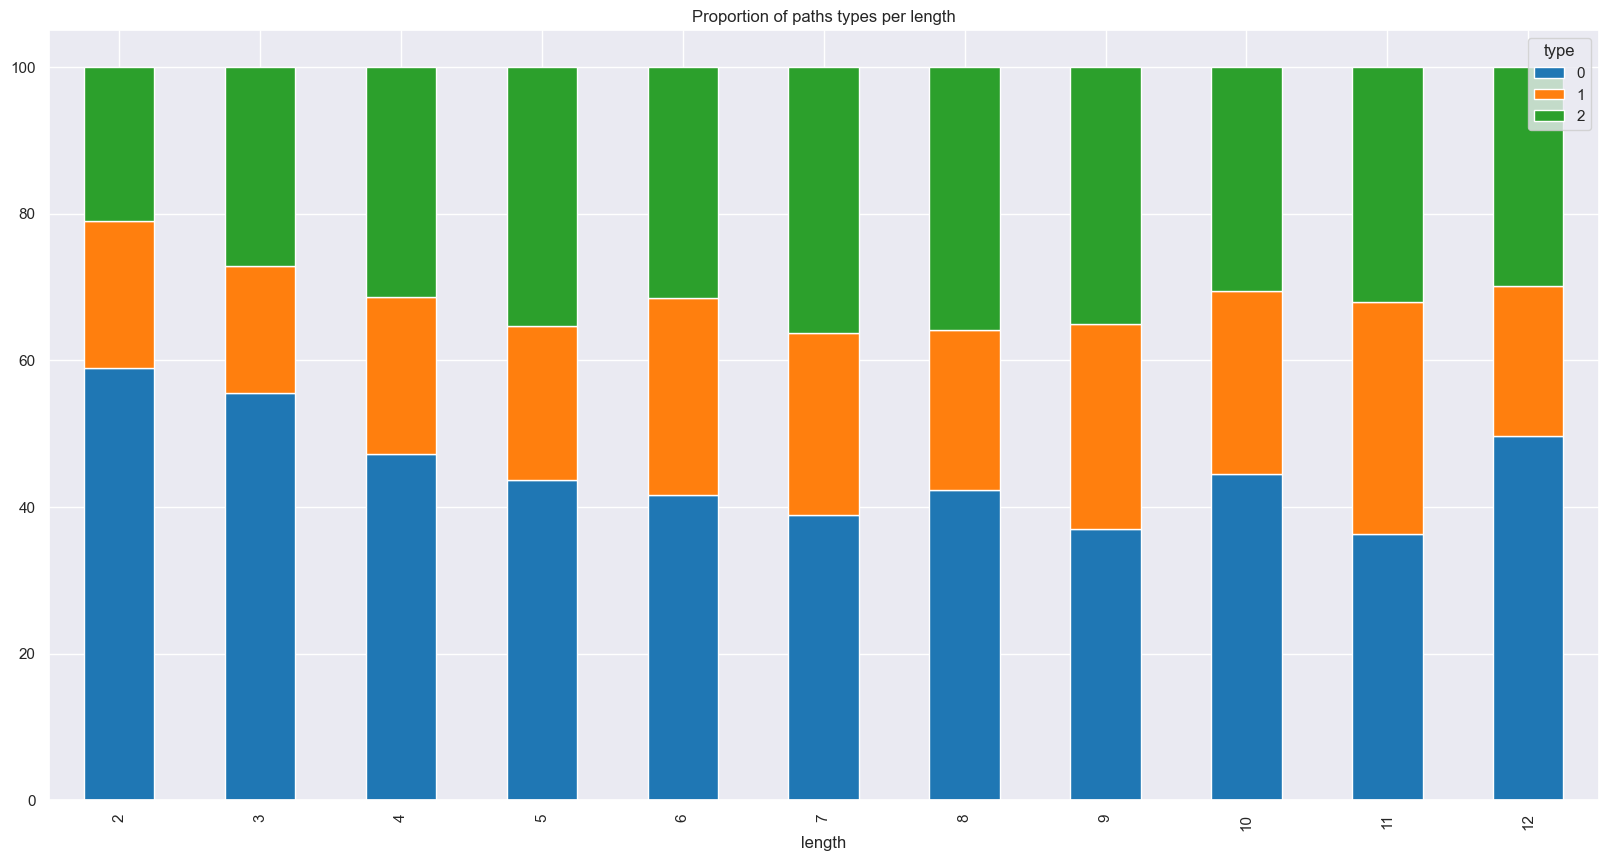

In [251]:
# plot the percentage of playerType 0, 1, 2 per length 
frite = df_paths_multiple_u.groupby(['length', 'type'], group_keys=False).size().groupby(level=0, group_keys=False).apply(lambda x: 100 * x / float(x.sum())).unstack()

# set the color of the bars
fig, ax = plt.subplots(figsize=(10, 5))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
frite.plot(kind='bar', stacked=True, figsize=(20,10), title='Proportion of paths types per length', color=colors, ax=ax)


<AxesSubplot: xlabel='length', ylabel='Count'>

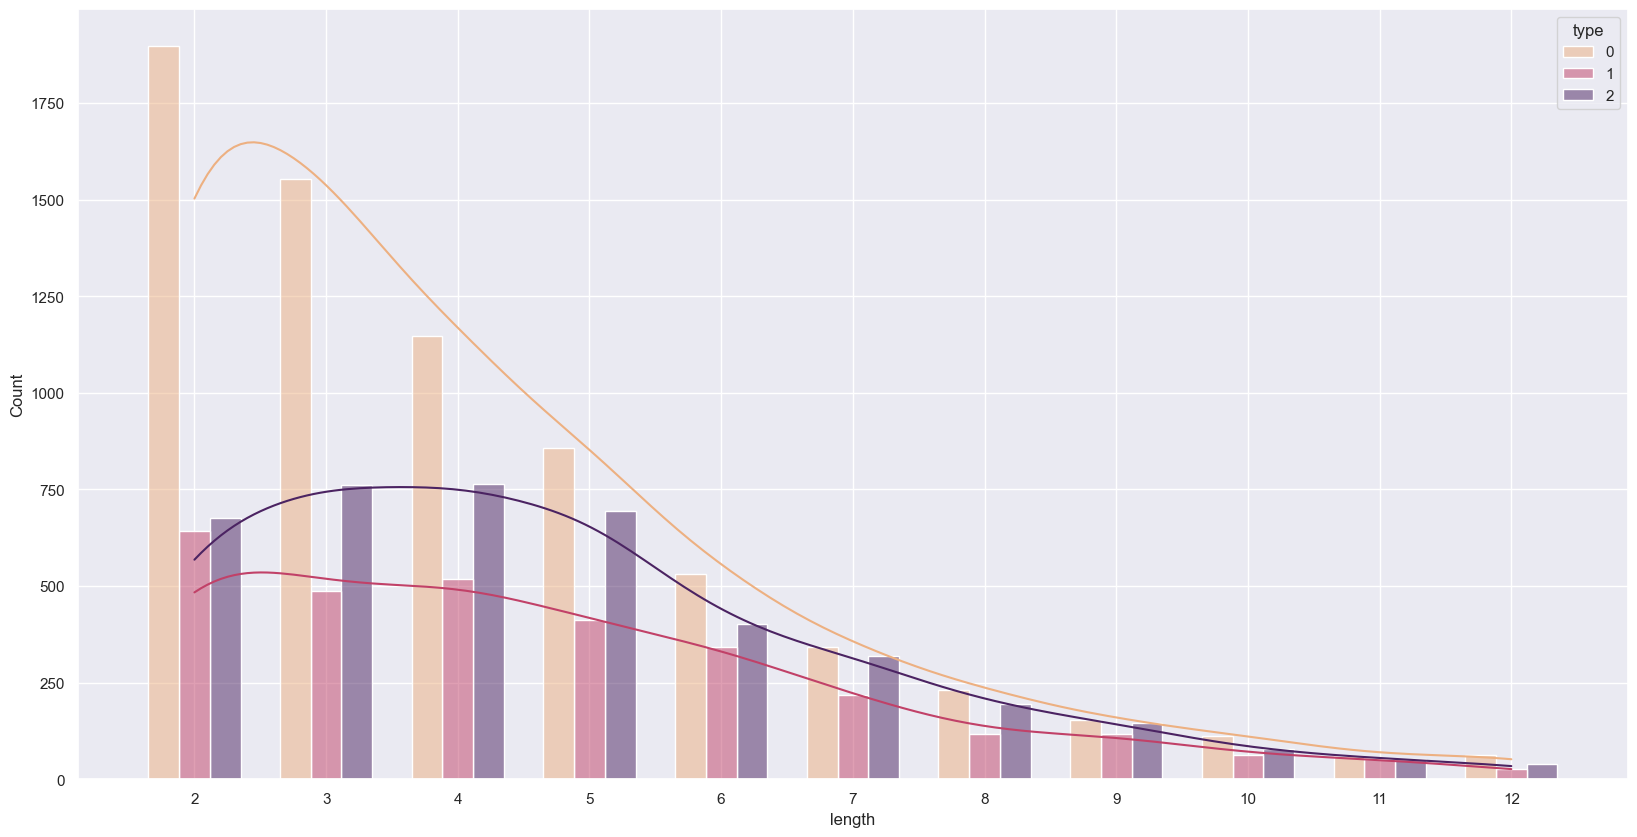

In [252]:
# plot the distribution of the type per length using hue type histplot plot and kde=true, 
sns.set_context("paper")
sns.set_style("darkgrid")
sns.set_theme(palette="flare")
fig, ax = plt.subplots( figsize=(20, 10))
# make sure that the x axis is exatly the same as the one given to the functioon

# change xticks to range(1, 22) to see the distribution of the length #
ax.set_xticks(range(1, 22))

sns.histplot(data=df_paths_multiple_u, x="length", hue="type",bins=35,stat = 'count',discrete= True, shrink=0.7,
  multiple="dodge", palette="flare", kde=True, ax=ax, kde_kws={'bw_method': 0.28})

<AxesSubplot: xlabel='score_article_similarity', ylabel='Count'>

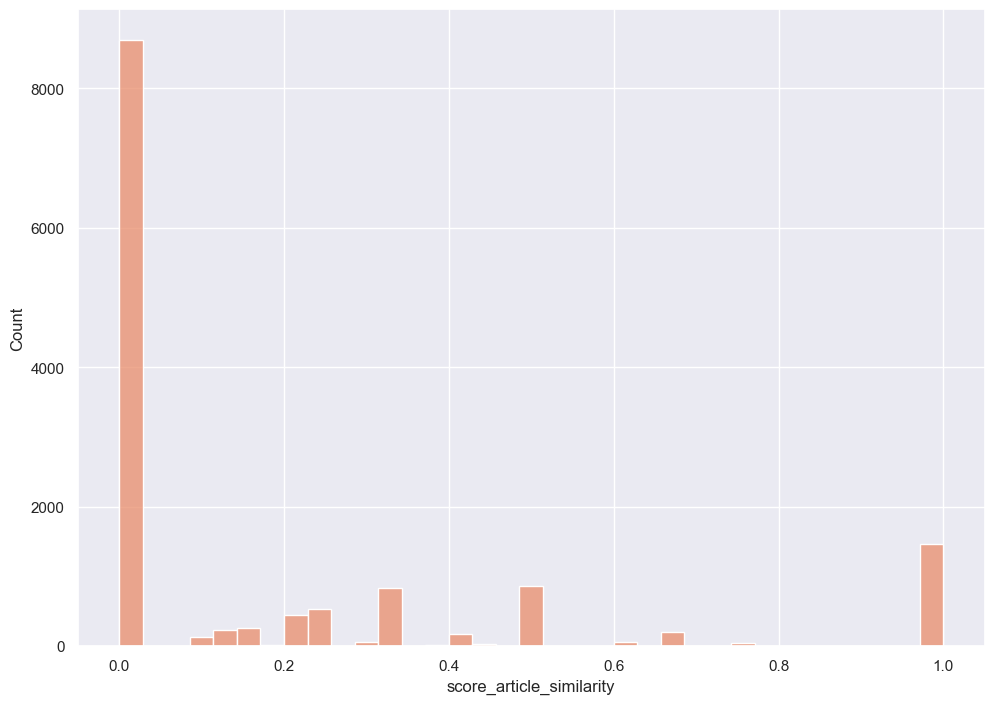

In [253]:
sns.histplot(data=df_paths_multiple_u, x="score_article_similarity",bins=35,stat = 'count')

<AxesSubplot: xlabel='score_title_similarity', ylabel='Count'>

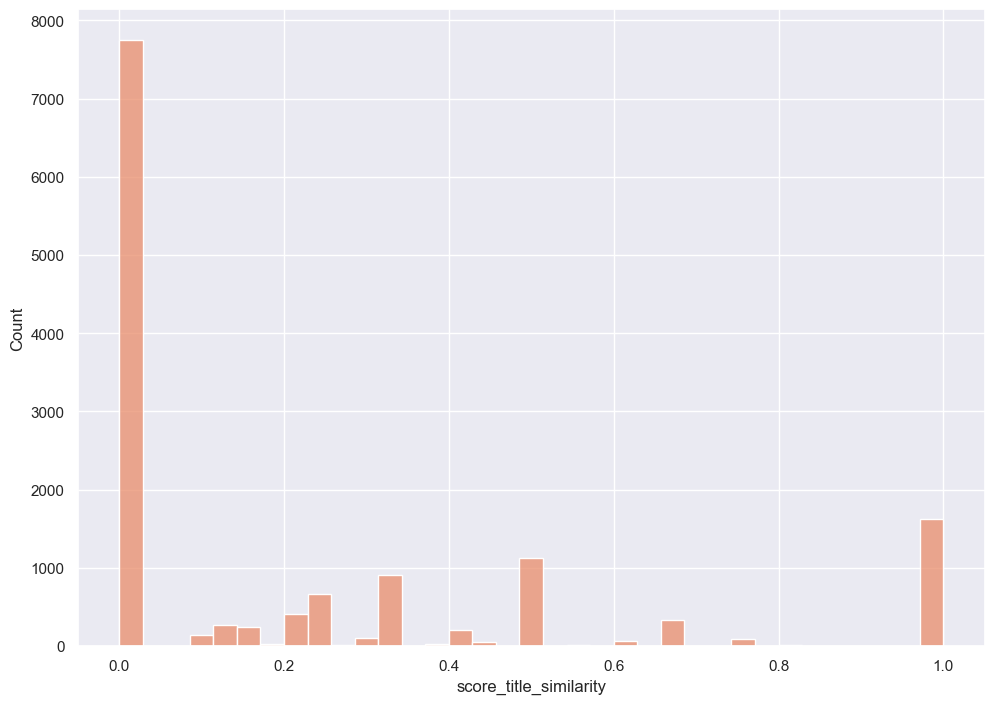

In [254]:
sns.histplot(data=df_paths_multiple_u, x="score_title_similarity",bins=35,stat = 'count')